<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaned-and-merged" data-toc-modified-id="Cleaned-and-merged-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaned and merged</a></span></li><li><span><a href="#Train-MNIST-using-mid-level-API" data-toc-modified-id="Train-MNIST-using-mid-level-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train MNIST using mid-level API</a></span><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#model" data-toc-modified-id="model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>model</a></span></li></ul></li></ul></div>

# Cleaned and merged

epoch,train_loss,valid_loss,accuracy,time
0,0.324136,0.276219,0.929600,00:08
1,0.121440,0.190576,0.942400,00:08
2,0.071328,0.150220,0.954100,00:08
3,0.045259,0.030927,0.989200,00:08
4,0.031417,0.020299,0.993400,00:08


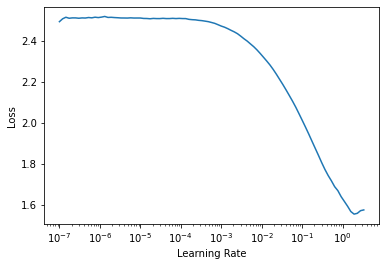

In [ ]:
from fastai.vision.all import *


### Data ###
path = untar_data(URLs.MNIST)
batch_size = 64*2*2*2
p = 8

items = get_image_files(path)
splits = GrandparentSplitter(train_name='training', valid_name='testing')(items)
dss = Datasets(items, tfms=[[PILImageBW.create],[parent_label, Categorize]], splits=splits)

cpu_tfms = [ToTensor(), CropPad(size=34, pad_mode=PadMode.Zeros), RandomCrop(size=28)]
gpu_tfms = [IntToFloatTensor(), Normalize()]
dls = dss.dataloaders(bs=batch_size, after_item=cpu_tfms, after_batch=gpu_tfms)


### Model ###
def convlayr(i, o): return ConvLayer(i, o, stride=2)
class ResBlock(Module):
    def __init__(self, nf):
        self.conv1 = ConvLayer(nf, nf, stride=1)
        self.conv2 = ConvLayer(nf, nf, stride=1)
    def forward(self, x): return x + self.conv2(self.conv1(x))
def conv_res(i,o): return nn.Sequential(convlayr(i,o), ResBlock(o))
mod = nn.Sequential(
    conv_res(1  ,p*1),
    conv_res(p*1,p*2),
    conv_res(p*2,p*4),
    conv_res(p*4,p*2),
    convlayr(p*2,dls.c),
    Flatten())


### Train ###
learn = Learner(dls, mod, metrics=accuracy)
learn.lr_find()
learn.fit_one_cycle(5, lr_max=1e-1)

# Train MNIST using mid-level API

## data

In [ ]:
from fastai.vision.all import *

In [ ]:
path          = untar_data(URLs.MNIST)
n_cls         = 10
im_size       = 28*28
batch_size    = 64*2*2*2

In [ ]:
items = get_image_files(path)
splits = GrandparentSplitter(train_name='training', valid_name='testing')(items)
dss = Datasets(items, tfms=[[PILImageBW.create],[parent_label, Categorize]], splits=splits)

In [ ]:
cpu_tfms = [ToTensor(), CropPad(size=34, pad_mode=PadMode.Zeros), RandomCrop(size=28)]
gpu_tfms = [IntToFloatTensor(), Normalize()]
dls = dss.dataloaders(bs=batch_size, after_item=cpu_tfms, after_batch=gpu_tfms)

torch.Size([512, 1, 28, 28])
torch.Size([512])
10


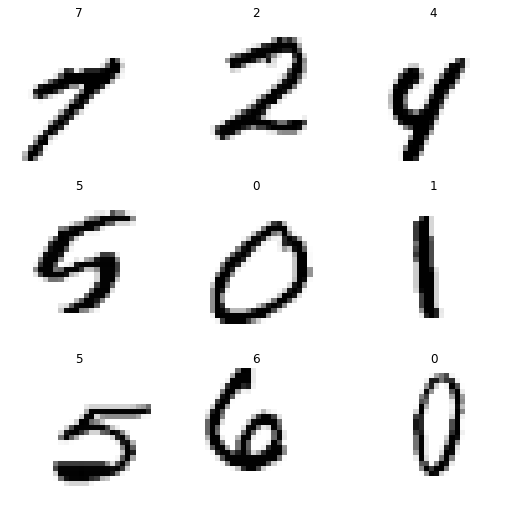

In [ ]:
xb, yb = dls.one_batch()
print(xb.shape, yb.shape, dls.c, sep='\n')
dls.show_batch()

## model

In [ ]:
def convlayr(i, o): return ConvLayer(i, o, stride=2)

class ResBlock(Module):
    def __init__(self, nf):
        self.conv1 = ConvLayer(nf, nf, stride=1)
        self.conv2 = ConvLayer(nf, nf, stride=1)
    def forward(self, x): return x + self.conv2(self.conv1(x))

def conv_res(i,o): return nn.Sequential(convlayr(i,o), ResBlock(o))

In [ ]:
f = 8
mod = nn.Sequential(
    conv_res(1  ,f*1),
    conv_res(f*1,f*2),
    conv_res(f*2,f*4),
    conv_res(f*4,f*2),
    convlayr(f*2,dls.c),
    Flatten()
)

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.10000000149011612)

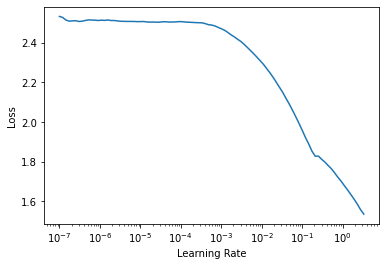

In [ ]:
learn = Learner(dls, mod, metrics=accuracy)
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_max=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.324727,0.438061,0.881200,00:08
1,0.120661,0.660701,0.792200,00:08
2,0.073142,0.077126,0.976000,00:08
3,0.046158,0.027200,0.990100,00:08
4,0.028802,0.019618,0.993700,00:08


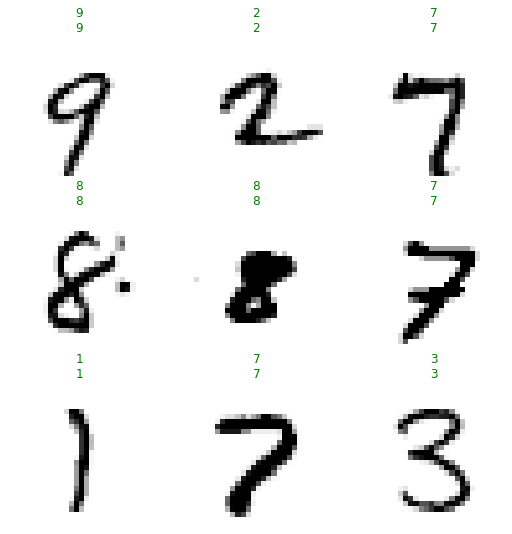

In [ ]:
learn.show_results()